In [21]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

In [22]:
y_train = pd.read_csv('../data/y_train_processed.csv')
y_test = pd.read_csv('../data/y_test_processed.csv')

X_train = pd.read_csv('../data/x_train_processed.csv')
X_test = pd.read_csv('../data/x_test_processed.csv')

X_train_ss = pd.read_csv('../data/x_train_ss_processed.csv')
X_test_ss = pd.read_csv('../data/x_test_ss_processed.csv')

In [9]:
from sklearn.feature_selection import SelectKBest

selector = SelectKBest(k=20)
selector.fit(X_train_ss, y_train)
# Get columns to keep and create new dataframe with those only
cols = selector.get_support(indices=True)
features_df_new = X_train_ss.iloc[:,cols]


/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [11] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [10]:
features_df_new

,cause_recoded_ord,sci_consensus_ord,harm_personally_ord,harm_US_ord,harm_dev_countries_ord,harm_future_gen_ord,harm_plants_animals_ord,when_harm_US_ord,educ_category_ord,reg_CO2_pollutant_ord,fund_research_ord,discuss_GW_ord,party_No party/not interested in politics,party_Republican,party_x_ideo_Liberal Democrat,party_x_ideo_Moderate/Conservative Democrat,party_x_ideo_No Party/Not Interested in politics,marit_status_Married,house_type_One-family house detached from any other house,service_attendance
0,0.292817,0.256712,-1.614592,-2.066116,-2.140823,0.520322,-0.259872,-0.244302,1.131387,0.592786,0.445366,-1.611867,-0.348963,-0.612706,1.960673,-0.510733,-0.348963,0.843649,0.620038,-0.623885
1,0.292817,0.952706,0.713491,0.580238,0.579085,0.520322,0.511553,-0.244302,1.131387,0.592786,0.445366,-1.611867,-0.348963,-0.612706,-0.510029,-0.510733,-0.348963,0.843649,0.620038,1.065607
2,0.292817,-0.263173,-1.614592,0.580238,0.579085,0.520322,0.511553,-0.244302,-0.947208,0.592786,0.445366,-1.611867,-0.348963,-0.612706,1.960673,-0.510733,-0.348963,0.843649,0.620038,-1.187049
3,0.292817,-0.263173,0.713491,0.580238,0.579085,0.520322,0.511553,-0.244302,0.092090,0.592786,0.445366,-1.611867,-0.348963,1.632105,-0.510029,-0.510733,-0.348963,0.843649,0.620038,1.628771
4,0.292817,0.952706,0.713491,0.580238,0.579085,0.520322,0.511553,-0.244302,-0.947208,0.592786,0.445366,0.620695,-0.348963,-0.612706,1.960673,-0.510733,-0.348963,-1.185328,0.620038,-0.623885
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17691,0.292817,0.952706,0.713491,0.580238,0.579085,0.520322,0.511553,-0.244302,0.092090,0.592786,0.445366,0.620695,-0.348963,1.632105,-0.510029,-0.510733,-0.348963,0.843649,0.620038,1.628771
17692,0.292817,-1.479051,0.713491,0.580238,0.579085,0.520322,0.511553,1.180579,-0.947208,-1.767435,-2.276779,0.620695,-0.348963,-0.612706,-0.510029,1.957971,-0.348963,0.843649,0.620038,1.065607
17693,0.292817,-0.263173,-1.614592,-2.066116,-2.140823,-2.419830,-2.443249,-1.669184,0.092090,-1.767435,0.445366,0.620695,-0.348963,-0.612706,-0.510029,-0.510733,-0.348963,0.843649,0.620038,-0.060721
17694,0.292817,0.952706,0.713491,0.580238,0.579085,0.520322,0.511553,-0.244302,0.092090,-1.767435,-2.276779,0.620695,-0.348963,-0.612706,1.960673,-0.510733,-0.348963,0.843649,-1.612805,1.065607


In [12]:
cols

array([18, 19, 20, 21, 22, 23, 24, 25, 27, 29, 30, 31, 33, 35, 37, 39, 40,
       59, 73, 78])

In [ ]:
noise_cols = [c for c in X_train_ss.columns if c not in X_train_ss_new.columns]

In [13]:
X_train_ss_new = X_train_ss.iloc[:,cols]
X_test_ss_new = X_test_ss.iloc[:,cols]
removed_cols = [c for c in X_train_ss.columns if c not in X_train_ss_new.columns]
X_train_ss_removed = X_train_ss.loc[:,removed_cols]
X_test_ss_removed = X_test_ss.loc[:,removed_cols]

In [14]:
from sklearn.decomposition import PCA
pca = PCA().fit(X_train_ss_removed)

In [15]:
pca.explained_variance_

array([4.77740374e+00, 2.86255019e+00, 2.14245133e+00, 1.87757323e+00,
       1.69887973e+00, 1.59007214e+00, 1.53745295e+00, 1.41948372e+00,
       1.27235970e+00, 1.23440045e+00, 1.21145951e+00, 1.16972752e+00,
       1.14349606e+00, 1.11436154e+00, 1.08760197e+00, 1.07156476e+00,
       1.06754938e+00, 1.03110769e+00, 1.02647645e+00, 1.01893447e+00,
       1.01271342e+00, 1.00411676e+00, 1.00047427e+00, 9.94768161e-01,
       9.85720248e-01, 9.75805070e-01, 9.58176626e-01, 9.38459864e-01,
       9.28696990e-01, 8.94767259e-01, 8.88397923e-01, 8.73965093e-01,
       7.98282969e-01, 7.42615687e-01, 6.68316273e-01, 6.03473992e-01,
       5.44651280e-01, 4.47405775e-01, 4.08064098e-01, 3.85602117e-01,
       3.07740949e-01, 1.12500748e-01, 9.19303512e-02, 6.55417566e-02,
       5.92111024e-02, 5.54126289e-02, 3.84064778e-02, 3.16106985e-02,
       1.30445868e-02, 5.34009269e-03, 3.24415964e-03, 2.45869551e-03,
       1.81486985e-03, 1.72795554e-03, 1.50609288e-03, 9.94351188e-04,
      

In [16]:
for i, l in enumerate(pca.explained_variance_):
    print('PC {}: {:.2f} --> {:.2f}%'.format(i, l,
                                             l * 100 / sum(pca.explained_variance_)))

PC 0: 4.78 --> 9.91%
PC 1: 2.86 --> 5.94%
PC 2: 2.14 --> 4.44%
PC 3: 1.88 --> 3.90%
PC 4: 1.70 --> 3.52%
PC 5: 1.59 --> 3.30%
PC 6: 1.54 --> 3.19%
PC 7: 1.42 --> 2.94%
PC 8: 1.27 --> 2.64%
PC 9: 1.23 --> 2.56%
PC 10: 1.21 --> 2.51%
PC 11: 1.17 --> 2.43%
PC 12: 1.14 --> 2.37%
PC 13: 1.11 --> 2.31%
PC 14: 1.09 --> 2.26%
PC 15: 1.07 --> 2.22%
PC 16: 1.07 --> 2.21%
PC 17: 1.03 --> 2.14%
PC 18: 1.03 --> 2.13%
PC 19: 1.02 --> 2.11%
PC 20: 1.01 --> 2.10%
PC 21: 1.00 --> 2.08%
PC 22: 1.00 --> 2.08%
PC 23: 0.99 --> 2.06%
PC 24: 0.99 --> 2.04%
PC 25: 0.98 --> 2.02%
PC 26: 0.96 --> 1.99%
PC 27: 0.94 --> 1.95%
PC 28: 0.93 --> 1.93%
PC 29: 0.89 --> 1.86%
PC 30: 0.89 --> 1.84%
PC 31: 0.87 --> 1.81%
PC 32: 0.80 --> 1.66%
PC 33: 0.74 --> 1.54%
PC 34: 0.67 --> 1.39%
PC 35: 0.60 --> 1.25%
PC 36: 0.54 --> 1.13%
PC 37: 0.45 --> 0.93%
PC 38: 0.41 --> 0.85%
PC 39: 0.39 --> 0.80%
PC 40: 0.31 --> 0.64%
PC 41: 0.11 --> 0.23%
PC 42: 0.09 --> 0.19%
PC 43: 0.07 --> 0.14%
PC 44: 0.06 --> 0.12%
PC 45: 0.06 --> 0.11

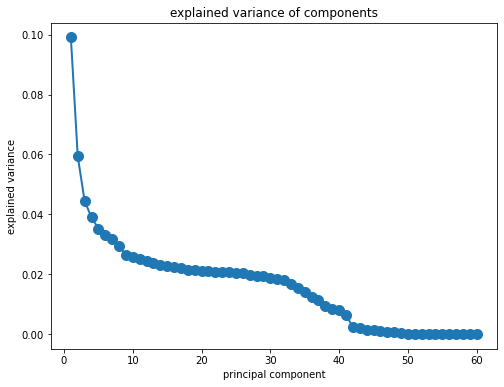

In [19]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(range(1,61), pca.explained_variance_ratio_, lw=2)
ax.scatter(range(1, 61), pca.explained_variance_ratio_, s=100)
ax.set_title('explained variance of components')
ax.set_xlabel('principal component')
ax.set_ylabel('explained variance');

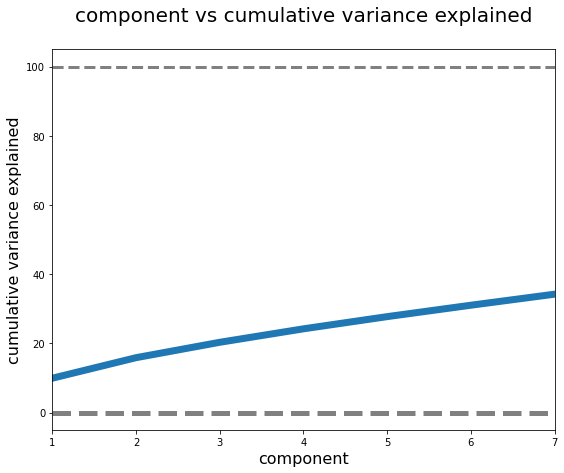

In [24]:
cum_var_exp = np.cumsum(pca.explained_variance_ratio_) * 100
plt.figure(figsize=(9,7))
component_number = range(1, 61)
plt.plot(component_number, cum_var_exp, lw=7)
plt.axhline(y=0, linewidth=5, color='grey', ls='dashed')
plt.axhline(y=100, linewidth=3, color='grey', ls='dashed')
ax = plt.gca()
ax.set_xlim([1,7])
ax.set_ylim([-5,105])
ax.set_ylabel('cumulative variance explained', fontsize=16)
ax.set_xlabel('component', fontsize=16)  
ax.set_title('component vs cumulative variance explained\n', fontsize=20);

In [27]:
pca.components_

array([[-3.93315784e-06, -2.82553697e-04,  9.31622806e-05, ...,
         1.44660780e-01,  2.26979726e-01,  2.48621942e-01],
       [-2.56819878e-04, -2.46596036e-03, -3.65793777e-04, ...,
         2.56211103e-01,  1.95053966e-01,  2.98809568e-01],
       [-5.13204652e-04,  1.83248980e-02, -6.89816149e-04, ...,
         3.85841120e-02, -6.17447199e-02, -1.73140245e-02],
       ...,
       [ 4.74345726e-03, -5.30490248e-04,  1.24267681e-03, ...,
        -1.28393054e-04,  2.62165935e-04,  9.63919583e-05],
       [ 9.93353346e-16, -2.23145134e-15,  1.71671743e-15, ...,
         4.64763537e-01,  4.92286690e-01, -7.19856633e-01],
       [ 0.00000000e+00,  3.37843313e-15, -1.24775711e-14, ...,
         7.20285303e-02,  7.62940376e-02, -1.11562571e-01]])

In [30]:
pca.components_[0]

array([-3.93315784e-06, -2.82553697e-04,  9.31622806e-05,  1.97746166e-04,
        3.88444183e-05, -2.11018063e-04, -5.04165737e-04, -4.05736180e-04,
        3.80154956e-03,  1.28575269e-03,  1.30833119e-05, -1.69406589e-21,
        6.64524753e-03, -4.17961530e-01,  1.86451272e-01, -3.94150937e-01,
       -3.24291882e-02, -3.24511720e-02,  3.95495126e-01, -5.88552419e-03,
       -4.10432615e-02, -6.46647127e-03, -1.35248825e-02, -1.57436071e-04,
       -5.43526727e-03, -7.21503341e-03,  2.30008274e-02,  2.81085709e-02,
        1.51165574e-03,  7.58122835e-03, -2.21071403e-02,  4.13096365e-03,
        1.95725040e-02, -2.25435261e-02,  3.08087434e-02,  2.67596619e-02,
        6.79919208e-02,  1.45230737e-02,  5.61337588e-02,  1.15150171e-02,
       -1.12117449e-01,  8.66907785e-02,  1.73775013e-01,  1.74946627e-02,
       -1.44861927e-01,  1.05571126e-01,  2.02294910e-02,  8.72958786e-02,
       -3.28011914e-01,  1.77988314e-01, -8.65747512e-03,  1.78484531e-01,
        9.24425938e-02, -

In [29]:
pca1_evec = pca.components_[0]

for weight, event in zip(pca1_evec, X_test_ss_removed.iloc[:,1:].columns):
    
    print(event, weight)

sci_consensus_ord_ind -3.933157840506055e-06
harm_personally_ord_ind -0.00028255369700035116
harm_US_ord_ind 9.316228064760318e-05
harm_dev_countries_ord_ind 0.00019774616607812212
harm_future_gen_ord_ind 3.884441832358032e-05
harm_plants_animals_ord_ind -0.0002110180630290337
when_harm_US_ord_ind -0.0005041657374166841
reg_CO2_pollutant_ord_ind -0.00040573618008712953
fund_research_ord_ind 0.003801549557509911
discuss_GW_ord_ind 0.0012857526938775286
worry 1.3083311867304129e-05
gender -1.6940658945086007e-21
age 0.00664524753472402
age_category_35_54 -0.4179615302817
age_category_55_plus 0.18645127228987263
year_ord -0.3941509370400634
wave_ord -0.03242918819977843
generation_ord -0.03245117197348331
income_category_ord 0.3954951258191975
party_Independent -0.00588552419457721
party_Other; Please specify: -0.04104326146050129
party_x_ideo_Independent (Non-Leaning) -0.006466471267217458
party_x_ideo_Liberal/Moderate Republican -0.013524882468351753
region4_Northeast -0.000157436071065

In [ ]:
# "new" columns -- PC's
pca_df = pd.DataFrame(pca.transform(X_train_ss_removed),
                      columns=['pc_' + str(i) for i in range(comb_n.shape[1])])
pca_df.head()